<a href="https://colab.research.google.com/github/ssondhi2027/pytorch-ml/blob/main/carsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time
import torch.optim as optim

In [2]:
!pip install tensorflow tensorflow-datasets

In [3]:
import tensorflow as tf

In [4]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    "plant_village",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.UISWR5_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [5]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation = 'softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(ds_train, validation_data=ds_test, epochs=5)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 93s 61ms/step - accuracy: 0.5560 - loss: 1.7935 - val_accuracy: 0.7787 - val_loss: 0.7169
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 75s 55ms/step - accuracy: 0.8632 - loss: 0.4353 - val_accuracy: 0.8333 - val_loss: 0.5788
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 75s 55ms/step - accuracy: 0.9285 - loss: 0.2268 - val_accuracy: 0.8435 - val_loss: 0.6057
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 75s 55ms/step - accuracy: 0.9547 - loss: 0.1380 - val_accuracy: 0.8306 - val_loss: 0.8190
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 75s 55ms/step - accuracy: 0.9631 - loss: 0.1120 - val_accuracy: 0.8393 - val_loss: 0.8548


In [14]:
import pandas as pd

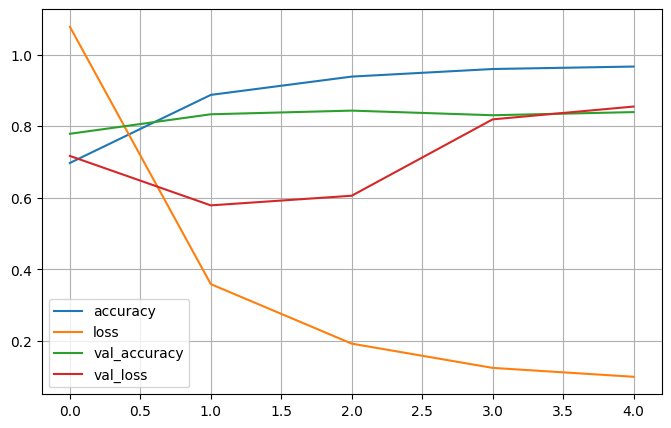

In [13]:
df_info = pd.DataFrame(history.history)
df_info.plot(figsize=(8, 5))
plt.grid(True)

In [16]:
ds_info.features['label'].names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomat

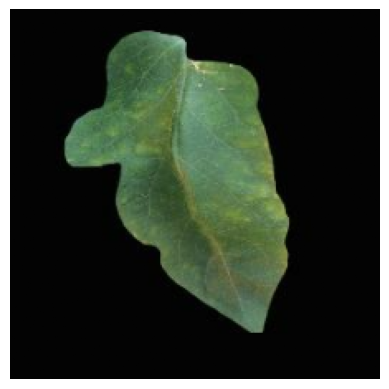

In [17]:
for image, label in ds_train.take(1):
    plt.imshow(image[2].numpy())
    # plt.title(f"Label: {ds_info.features['label'].int2str(label[0].numpy())}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


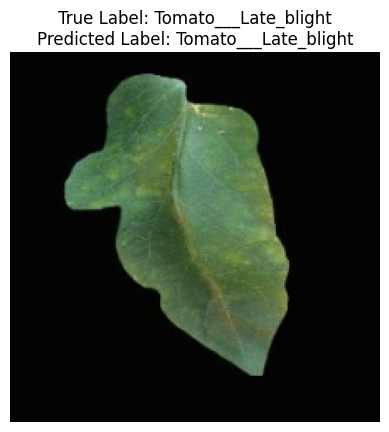

In [24]:
for image, label in ds_train.take(1):
    # Expand dimensions to create a batch of 1 image
    input_image = tf.expand_dims(image[2], axis=0)

    # Get model prediction
    predictions = model.predict(input_image)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class name
    predicted_class_name = ds_info.features['label'].int2str(predicted_class_index)

    # Get the true class name
    true_class_name = ds_info.features['label'].int2str(label[2].numpy())

    plt.imshow(image[2].numpy())
    plt.title(f"True Label: {true_class_name}\nPredicted Label: {predicted_class_name}")
    plt.axis('off')
    plt.show()